In [28]:
import pynbody
import numpy as np
import scipy.optimize


In [29]:
def CoreRadius (alpha_1, alpha_2, x, x_1,  x_2, beta_1, gamma_1):
    return(10**alpha_1*((alpha_2 + (x/x_1))**(-beta_1))*((x/x_2)**gamma_1))

def s_radius(r_2, x, x_3, x_4, beta_2, BETA, gamma_2):
    return(r_2*((1+x/x_3)**-beta_2)+(BETA*(x/x_4)**gamma_2))

def S_CoreEinasto(r,rho_s,r_s,r_c,a, x, y0):
    return( x * -0.1 + y0)
### could also multiply x by a random interger that is a good guess for the slope that you are calculating (between -1 and 0)

###Need to make sure that this code is changed if you're switching between simulations, set halo=sim_halo
def CoreEinasto(S_CoreEinasto, halo, core_rad):
    halo=halo
    pynbody.analysis.angmom.faceon(halo)
    if core_rad > 10:
        prof = pynbody.analysis.profile.Profile(halo.dm, vmin =.25, max=core_rad, ndim=3)
    else:
        prof = pynbody.analysis.profile.Profile(halo.dm, vmin =.25, max=10, ndim=3)
    if RADIUS > 1:
        N = (prof['rbins'] < RADIUS).sum()
    else:
        N = (prof['rbins'] < 1).sum()
    x,y = np.log10(prof['rbins'][:N+1]),np.log10(prof['density'][:N+1])
    y[np.isneginf(y)] = 0.1
    par,err = scipy.optimize.curve_fit(S_CoreEinasto,x,y)
    x_in = np.log10(prof['rbins'][:N+1][(prof['rbins'][:N+1]<par[2])])
    y_in = np.log10(prof['density'][:N+1][(prof['rbins'][:N+1]<par[2])])
    y_in[np.isneginf(y_in)] = 0.1
    if len(x_in) > 0:
        line =  np.polyfit(x_in,y_in,1)
    else:
        x_in = np.log10(prof['rbins'][:N+1])
        y_in = np.log10(prof['density'][:N+1])
        y_in[np.isneginf(y_in)] = 0.1
        line =  np.polyfit(x_in,y_in,1)
    return(line)

In [12]:
import os
#os.environ['TANGOS_DB_CONNECTION'] = '/home/bk639/Merians_db/tangos_data1.db'
os.environ['TANGOS_DB_CONNECTION'] = '/home/bk639/data/MerianSIDM/MerianSIDM.db'
os.environ['TANGOS_SIMULATION_FOLDER'] = '/home/bk639/data/MerianSIDM/'
#load tangos database

#make sure to only load tangos after setting environment variable otherwise it will see nothing
import tangos
import pynbody
#export TANGOS_DB_CONNECTION=/home/bk639/Merians_db/tangos_data.db
# set the environment variable

sims = tangos.all_simulations()


#sim = tangos.get_simulation('r492.romulus25si2s50v35')
sim = tangos.get_simulation('r492.romulus25.3072g1HsbBH')
print(sim.path)

r492.romulus25.3072g1HsbBH


In [13]:
sim.timesteps[-1].extension

'r492.romulus25.3072g1HsbBH.004096'

In [16]:
halo = sim.timesteps[-1].halos[1]
print(halo['rho_dm'])
rho_dm = halo['rho_dm']
rbins = halo['rho_dm_rbins']

[7.24515620e+07 2.93165796e+07 5.93128579e+07 9.60006974e+07
 6.21526882e+07 1.00597099e+08 1.01763260e+08 9.05897868e+07
 6.66472286e+07 9.97813476e+07 6.54733312e+07 9.18421557e+07
 8.86188188e+07 7.75005193e+07 7.76968558e+07 7.65142398e+07
 8.33787432e+07 7.14454326e+07 7.62888594e+07 7.73356998e+07
 7.81007230e+07 7.89528946e+07 7.38834185e+07 7.19175581e+07
 7.20744989e+07 6.57217036e+07 6.56709984e+07 6.40260738e+07
 6.15389460e+07 6.26438538e+07 5.63993409e+07 5.70787861e+07
 5.01558692e+07 4.94232061e+07 4.58680178e+07 4.32019367e+07
 3.88874373e+07 3.65272042e+07 3.45562461e+07 3.21404753e+07
 2.88432316e+07 2.67406563e+07 2.44909128e+07 2.18696288e+07
 1.94768873e+07 1.75975631e+07 1.53051330e+07 1.35829026e+07
 1.18154812e+07 1.04100433e+07 9.31607097e+06 7.92120434e+06
 7.08346133e+06 5.96773712e+06 5.15608049e+06 4.37243747e+06
 3.71734352e+06 3.22241702e+06 2.80885739e+06 2.48268019e+06
 2.21480198e+06 1.93331749e+06 1.71515746e+06 1.51068102e+06
 1.31724663e+06 1.141797

In [10]:

#file path is in TANGOS_SIMULATION_FOLDER/sim.basename/sim.timesteps[-1].extension
filepath = os.path.join(os.environ['TANGOS_SIMULATION_FOLDER'],sim.basename,sim.timesteps[-1].extension)
print(os.environ['TANGOS_SIMULATION_FOLDER'],sim.basename,sim.timesteps[-1].extension)

# How is 
# /home/bk639/MerianSIDM/r492.romulus25si2s50v35/r492.romulus25si2s50v35.3072g1HsbBH.004096
# different from
# /home/bk639/data/MerianSIDM/r492.romulus25si2s50v35
print(filepath)
sim = pynbody.load(filepath)
sim.physical_units()

/home/bk639/data/MerianSIDM/ r492.romulus25si2s50v35 r492.romulus25si2s50v35.3072g1HsbBH.004096
/home/bk639/data/MerianSIDM/r492.romulus25si2s50v35/r492.romulus25si2s50v35.3072g1HsbBH.004096


In [11]:
halo = sim.halos()[1]
print(len(halo.s))

pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.


1307161


In [13]:
pynbody.analysis.angmom.faceon(halo)

In [14]:
prof = pynbody.analysis.profile.Profile(halo.dm, vmin =.25, max=10, ndim=3)

In [13]:
###Find the value of the core radius
a = 0.16
Mstar = np.sum(halo.s['mass'])
Mhalo = np.sum(halo['mass'])
Xmsmh = Mstar/Mhalo
r_c = CoreRadius(1.21, 0.71, Mstar/Mhalo, 7.2*1e-3, 0.011, 2.31, 1.55)
r_c = float(r_c)



r = Rvir
if r < 10:
    RADIUS = r
else:
    RADIUS = 10

###Find R_2 value
for i in range(len(p['rbins'])):
    x1 = np.log10(p['rbins'][i]/Rvir)
    x2 = np.log10(p['rbins'][i+1]/Rvir)
    y1 = np.log10(p['density'][i])
    y2 = np.log10(p['density'][i+1])
    m = (y1-y2)/(x1-x2)
    if m < -2:
        r_2 = p['rbins'][i]
        break
        
###Find R_s
r_s = s_radius(r_2, Mstar/Mhalo, 0.044, 0.28, 31.79, 1.51, 0.40)

###Find Rho_s value, relies on R_s calculation
low = []
high = []
for i in range(len(p['rbins'])): 
    if r_s >= p['rbins'][i]:
        low.append(p['rbins'][i])
    else:
        high.append(p['rbins'][i])
z = len(low)-1
try:
    Lval = max(low)
    Hval = min(high)
    Ldiff = r_s - Lval
    Hdiff = Hval - r_s
    if Ldiff < Hdiff:
        rho_s = p['density'][z]
    else:
        rho_s = p['density'][z+1]
except:
    ValueError
    rho_s = p['density'][0]

Xmsmh = Mstar/Mhalo
x,y = np.log10(p['rbins']),np.log10(p['density'])
y0 = y[0]
S_CoreEinasto(r,rho_s,r_s,r_c,a,x, y0)

Core_ES = CoreEinasto(S_CoreEinasto, halo, r_c)

/tmp/ipykernel_3345903/2475273282.py:25: OptimizeWarning: Covariance of the parameters could not be estimated
  par,err = scipy.optimize.curve_fit(S_CoreEinasto,x,y)


In [14]:
print(Core_ES)
###Spits out the slope and intercept of the linear fit, core_slope is the 0th value in the array (in logscale)
print(Core_ES[0])

print(r_s)

[-0.03345653  7.54285241]
-0.033456529010868076
0.4118972409208907


Text(-0.5, 7, 'slope = -0.033456529010868076')

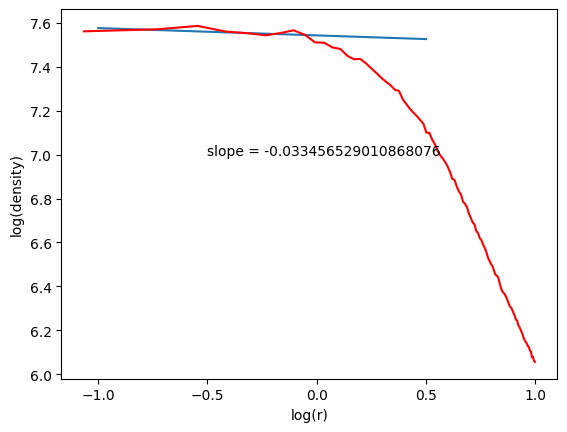

In [18]:
import matplotlib.pyplot as plt
###Visual check to make sure that the core_slope fit matches the density profile
x = np.linspace(-1, 0.5, 100)
y = x*Core_ES[0] + Core_ES[1]
plt.plot(x,y)

x1,y1 = np.log10(p['rbins']),np.log10(p['density'])
plt.plot(x1,y1, c='red')
plt.xlabel('log(r)')
plt.ylabel('log(density)')
#add slope value to plot
plt.text(-0.5, 7, 'slope = {}'.format(Core_ES[0]))

#plt.vlines(np.log10(r_s),6.5,8.5, color='green')

In [18]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from scipy.stats import chi2

def einasto_profile(r, rho_0, r_2, alpha):
    """
    Einasto density profile function.
    
    Parameters:
    -----------
    r : array-like
        Radial distances
    rho_s : float
        Scale density
    r_s : float
        Scale radius
    alpha : float
        Shape parameter
    
    Returns:
    --------
    array-like
        Density values at given radii
    """
    x = r/r_2
    y = -2/alpha * (x**alpha - 1)
    rho = rho_0 * np.exp(y)
    return rho

def fit_einasto(r, rho, rho_err=None, p0=None):
    """
    Fit Einasto profile to density data.
    
    Parameters:
    -----------
    r : array-like
        Radial distances
    rho : array-like
        Density values
    rho_err : array-like, optional
        Uncertainties in density values
    p0 : tuple, optional
        Initial parameter guess (rho_s, r_s, alpha)
    
    Returns:
    --------
    tuple
        Best-fit parameters and covariance matrix
    """
    if p0 is None:
        # Make educated guesses for initial parameters
        rho_s_guess = np.max(rho)
        r_s_guess = r[len(r)//2]  # middle radius
        alpha_guess = 0.2  # typical value for dark matter halos
        p0 = (rho_s_guess, r_s_guess, alpha_guess)
    
    try:
        if rho_err is not None:
            popt, pcov = scipy.optimize.curve_fit(
                einasto_profile, r, rho, 
                p0=p0, 
                sigma=rho_err,
                bounds=([0, 0, 0], [np.inf, np.inf, 2])  # physical constraints
            )
        else:
            popt, pcov = scipy.optimize.curve_fit(
                einasto_profile, r, rho, 
                p0=p0,
                bounds=([0, 0, 0], [np.inf, np.inf, 2])
            )
        return popt, pcov
    except RuntimeError:
        raise RuntimeError("Fitting failed to converge. Try different initial parameters.")

def plot_einasto_fit(r, rho, popt, pcov, rho_err=None, r_range=None):
    """
    Plot data points and fitted Einasto profile.
    
    Parameters:
    -----------
    r : array-like
        Radial distances
    rho : array-like
        Density values
    popt : tuple
        Best-fit parameters (rho_s, r_s, alpha)
    pcov : array-like
        Covariance matrix
    rho_err : array-like, optional
        Uncertainties in density values
    r_range : tuple, optional
        (r_min, r_max) for plotting smooth curve
    """
    plt.figure(figsize=(10, 6))
    
    # Plot data points
    if rho_err is not None:
        plt.errorbar(r, rho, yerr=rho_err, fmt='o', label='Data')
    else:
        plt.scatter(r, rho, label='Data')
    
    # Create smooth curve for fitted profile
    if r_range is None:
        r_min, r_max = np.min(r), np.max(r)
    else:
        r_min, r_max = r_range
    
    r_smooth = np.logspace(np.log10(r_min), np.log10(r_max), 1000)
    rho_fit = einasto_profile(r_smooth, *popt)
    
    # Plot fitted profile
    plt.plot(r_smooth, rho_fit, 'r-', label='Einasto fit')
    
    # Calculate and plot confidence bands (if covariance matrix is available)
    if pcov is not None:
        # Generate random parameters from the covariance matrix
        n_samples = 1000
        params = np.random.multivariate_normal(popt, pcov, size=n_samples)
        
        # Calculate profiles for each parameter set
        profiles = np.array([einasto_profile(r_smooth, *p) for p in params])
        
        # Calculate confidence intervals
        lower = np.percentile(profiles, 2.5, axis=0)
        upper = np.percentile(profiles, 97.5, axis=0)
        
        plt.fill_between(r_smooth, lower, upper, color='r', alpha=0.2,
                        label='95% confidence')
    
    plt.xlabel('Radius')
    plt.ylabel('Density')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    
    #add vertical line at r_2
    r_2 = popt[1]
    plt.axvline(r_2, color='k', linestyle='--', label='r_2')
    
    
    # Add fit parameters to plot
    param_text = f'ρs = {popt[0]:.2e}\nrs = {popt[1]:.2f}\nα = {popt[2]:.3f}'
    plt.text(0.02, 0.98, param_text, transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()





[2.07379094e+07 2.22784102e+00 1.44894925e+00]


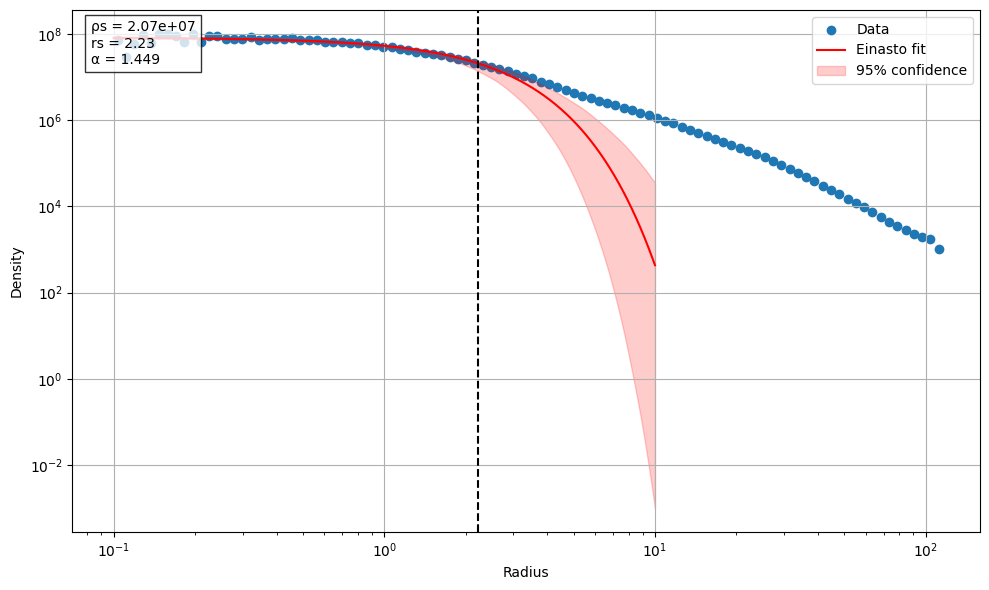

In [21]:
#fit the einasto profile to the data and plot the data and the fit, and the r_2 value

r = rbins
rho = rho_dm
popt, pcov = fit_einasto(r, rho)
print(popt)
plot_einasto_fit(r, rho, popt, pcov, r_range=(0.1, 10))


    
    